# SOME-TOOLS for geographycal map plots
-----------------------------------------
Small tutorial for plotting routines with `some_tools` package and PyGMT library.
Here we show the possibilities of mapping with geographical map
Let's set up the imports ...

In [1]:
%matplotlib inline
import logging
import some_tools
from some_tools import plot_pygmt as PG
#
logging.basicConfig(format="%(name)s - %(funcName)s [%(levelname)s] %(message)s",
                    level=logging.INFO)
print("SOME-tools version:  %s" % some_tools.__version__)


SOME-tools version:  0.0.5


From version `0.0.2` the `plot_pygmt` module, offers API for the geographical part: _epicentral maps_, _depth sections_, and _elevation profile_.

- __SomeMapping__ : in charge of plotting maps and sections
- __SomeSection__ : in charge of plotting depth sections with hypocenters
- __SomeElevation__ : in charge of plotting depth sections with hypocenters

Here we'll focus on __SomeSection__!!!
First, let's initialize the class API and load the `GAPSS` experiment dataset in southern tuscany (Larderello-Travale geothermal field).

In [2]:
SS = PG.SomeSection("./database/gapss_initial_events.csv")
dataframe = SS.get_database()
dataframe.head()

some_tools.io - _pd_select_columns [WARNING] Only MANDATORY field extracted. Missing additional ['OT', 'MAGTYPE']
some_tools.plot_pygmt - _project_dataframe [INFO] Creating projected DataFrame
some_tools.plot_pygmt - _define_plot_parameters [INFO] Setting-up the GMT section plot parameters! (overriding if already present)
some_tools.plot_pygmt - _auto_scale_plot [WARNING] Auto scaling the class REGION-plot attributes!
some_tools.plot_pygmt - _auto_frame_plot [WARNING] Auto scaling the class FRAME-plot attributes!


,LON,MAG,DEP,ID,LAT
0,10.98950,1.399,5.00,sometools_1,43.13250
1,11.34950,1.969,5.09,sometools_2,43.29883
2,11.20517,1.589,4.32,sometools_3,43.03917
3,10.91067,1.543,5.84,sometools_4,43.19617
4,11.33817,1.682,9.70,sometools_5,43.30317


The `SomeSection` class must be initialized with a DATASET. It can optionally take a GRID-FILE (elevation), and a specific CONFIGURATION-FILE (please refer to the ad-hoc book in this folder). All of these attributes may be add in a later stage with the dedicated modules:

- `set_database`
- `set_gridfile`
- `set_configfile`

The class loader will take into account an event catalog. The format supported are `pandas.DataFrame`, `geopandas.GeoDataFrame`, or a path to a `*csv*` file. The loader will seek for the following columns/keys (mandatory field with `*`):

- `ID*`: **non-case sensitive** possible variation `["id", "event_id", "eqid", "eq_id", "evtid", "#"]`
- `OT`: **non-case sensitive** possible variation `["ot", "origin_time", "utc_datetime", "evtdatetime", "utc"]`
- `LON*`: **non-case sensitive** possible variation `["lon", "longitude", "ev_longitude", "evlo"]`
- `LAT*`: **non-case sensitive** possible variation `["lat", "latitude", "ev_latitude", "evla"]`
- `DEPTH*`: **non-case sensitive** possible variation `["dep", "depth", "ev_depth", "evdp"]`
- `MAG*`: **non-case sensitive** possible variation `["mag", "magnitude", "ev_magnitude", "evmag"]`
- `MAGTYPE`: **non-case sensitive** possible variation`["magtype", "mag_type", "magnitude_type", "evmagtype"]`

If the `ID` field, if missing, will be automatically filled by the class.
All of the mandatory fields must be present in the input database. An error will raise if not.
The internal dataframe instance is converted as a `pandas.DataFrame`.

------------------------------------------------------------------------------------------------

Now let's do some plotting, using the defaults parameter

some_tools.plot_pygmt - plot_section [INFO] Creating SECT for 1740 events ...


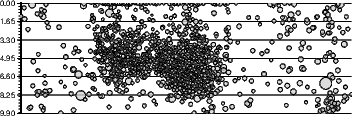

In [3]:
SS.plot_section()

As you see, the default setting of `auto_scale` fix the region based on the max/min lon/lat of our catalog. The `auto_frame` option as well automatically finds the eye-pleaseant ratio for the axis (major and minor ticks).


The default settings for the sections are meant for Europe:
```
  auto_scale: True                  
  section_profile: [1, 46, 21, 46]
  events_project_dist: "all"
```

In fact if I remove the `auto_scale` parameter ...

some_tools.plot_pygmt - _update [INFO] Updating plotting parameters
some_tools.plot_pygmt - _project_dataframe [INFO] Creating projected DataFrame
some_tools.plot_pygmt - _define_plot_parameters [INFO] Setting-up the GMT section plot parameters! (overriding if already present)
some_tools.plot_pygmt - _auto_frame_plot [WARNING] Auto scaling the class FRAME-plot attributes!
some_tools.plot_pygmt - plot_section [INFO] Creating SECT for 1740 events ...


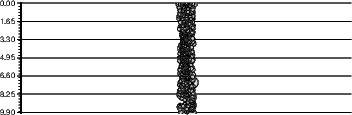

In [4]:
SS.update_configuration(auto_scale=False)
SS.plot_section()

... you see that the section_profile specified is waaay to much wider.

Let's go back with `auto_scale` active and with a fixed frame (on the X axis are show the distance along profile km)

some_tools.plot_pygmt - _update [INFO] Updating plotting parameters
some_tools.plot_pygmt - _project_dataframe [INFO] Creating projected DataFrame
some_tools.plot_pygmt - _define_plot_parameters [INFO] Setting-up the GMT section plot parameters! (overriding if already present)
some_tools.plot_pygmt - _auto_scale_plot [WARNING] Auto scaling the class REGION-plot attributes!
some_tools.plot_pygmt - plot_section [INFO] Creating SECT for 1740 events ...


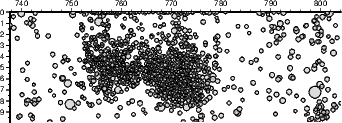

In [7]:
SS.update_configuration(auto_scale=True, auto_frame=False,   plot_frame={
    'big_x_tick_interval': 10.0,
    'small_x_tick_interval': 2.0,
    'big_y_tick_interval': 1.0,
    'small_y_tick_interval': 0.5,
    'show_grid_lines': False,  
    'annotate_axis': "WN"
})

SS.plot_section()

If I want to modify the plot aspect, I must provide a dictionary as follow... play around with it to get confident

some_tools.plot_pygmt - plot_section [INFO] Creating SECT for 1740 events ...


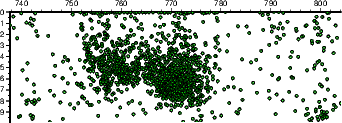

In [8]:
map_plot_dict = {
  "event_color": "green@30",
  "event_size": 0.1,       # float: represent a mag 1 eventsize if scale_magnitude==True
  "scale_magnitude": False  # bool: if True plot scaled event
}

SS.plot_section(plot_config=map_plot_dict)

Much better right?!

Please remember that you can use also a path to a `*yml` config file both for the `plot_config` parameter of the `plot_map` method, but also for the `set_config_file` method. For the `update_configuration` method, please use only key-args only.

Please refer to the `ConfigFile_README.md` document to see the package defaults and the possible options

--------------------------------------------------------------------------------------------------------------

Now if we want to provide the elevation grid, we must initialize a __SomeElvation__ instance with a grid file! (no database needed)
and we can straightforwardly plot it. The `auto_scale` and `auto_frame` parameter will do the rest ...

As saw in the previous notebook, the default parameter are set for European dataset
```
  auto_scale: True
  section_profile: [1, 46, 21, 46]  # lon1, lat1, lon2, lat2
  section_elevation: [-1, 6]  # km
  sampling_dist: 1  #km
```

For this reason we need to first change the `section_profile` to a more correct one.

some_tools.plot_pygmt - _load_grid [INFO] Setting grid file ... ./database/LTGF.nc
some_tools.plot_pygmt - _define_plot_parameters [INFO] Setting-up the GMT section plot parameters! (overriding if already present)
some_tools.plot_pygmt - _gridtrack_elevation [INFO] Creating elevation profile
grdtrack [WARNING]: Some input points were outside the grid domain(s).
some_tools.plot_pygmt - _define_plot_parameters [WARNING] Profile is EMPTY!
some_tools.plot_pygmt - _define_plot_parameters [WARNING] Profile is EMPTY!
some_tools.plot_pygmt - _update [INFO] Updating plotting parameters
some_tools.plot_pygmt - _define_plot_parameters [INFO] Setting-up the GMT section plot parameters! (overriding if already present)
some_tools.plot_pygmt - _gridtrack_elevation [INFO] Creating elevation profile
some_tools.plot_pygmt - _auto_scale_plot [WARNING] Auto scaling the class REGION-plot attributes!
some_tools.plot_pygmt - _auto_frame_plot [WARNING] Auto scaling the class FRAME-plot attributes!
some_tools.

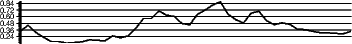

In [11]:
SE = PG.SomeElevation("./database/LTGF.nc")
SE.update_configuration(section_profile=[10.65, 43.15, 11.18, 43.15])
SE.plot_elevation_profile()

I can modify of course all the configuration parameter ...

some_tools.plot_pygmt - _update [INFO] Updating plotting parameters
some_tools.plot_pygmt - _define_plot_parameters [INFO] Setting-up the GMT section plot parameters! (overriding if already present)
some_tools.plot_pygmt - _gridtrack_elevation [INFO] Creating elevation profile
some_tools.plot_pygmt - plot_elevation_profile [INFO] Creating ELEVATION PROFILE ...


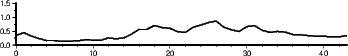

In [20]:
elevation_config = {
  'section_elevation': [0, 1.5],
  'auto_scale': False,
  'auto_frame': False,
  'plot_frame': {
    'big_x_tick_interval': 10.0,
    'small_x_tick_interval': 2,
    'big_y_tick_interval': 0.5,
    'small_y_tick_interval': 0.25,
    'show_grid_lines': False,  # will plot major tick grid lines on Y-axis major-tick
    'annotate_axis': "WS"  # combination of W E S N / False --> no ax-label shown    
}}

SE.update_configuration(**elevation_config)
SE.plot_elevation_profile()

I can modify of course all the plotting parameter ...

some_tools.plot_pygmt - plot_elevation_profile [INFO] Creating ELEVATION PROFILE ...


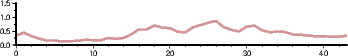

In [21]:
elevation_plot_dict = {
  'profile_width': "2p",
  'profile_color': "brown@50"
}

SE.plot_elevation_profile(plot_config=elevation_plot_dict)

Much better right?!

Please remember that you can use also a path to a `*yml` config file both for the `plot_config` parameter of the `plot_map` method, but also for the `set_configfile` method. For the `update_configuration` method, please use only key-args only.

Please refer to the `ConfigFile_README.md` document to see the package defaults and the possible options